In [1]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import sys
sys.path.append('/mnt/0A2AAC152AABFBB7/CGE/luxgiant-dstream')
from luxgiant_dstream.prep_ds import PrepDS
from luxgiant_dstream.gwas_fixed import GWASfixed
from luxgiant_dstream.gwas_random import GWASrandom

In [2]:
params = json.load(open("//home/luis/data/testDownStream/configFiles/parameters.JSON"))
paths = json.load(open("//home/luis/data/testDownStream/configFiles/paths_local.JSON"))

In [3]:
prep = PrepDS(
    input_path=paths['input_directory'],
    input_name=paths['input_prefix'],
    output_path=paths['output_directory'],
    output_name=paths['output_prefix'],
    config_dict=params,
    dependables_path=paths['dependables_directory'],
)

In [4]:
prep_steps = {
    'ld_prune': prep.exclude_high_ld_hla,
    'pca'     : prep.pca_decomposition
}

for step in prep_steps.keys():
    prep_steps[step]()

PLINK v1.90b7.4 64-bit (18 Aug 2024)           www.cog-genomics.org/plink/1.9/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/luis/data/testDownStream/outputData/preparatory/ds_results_prunning.log.
Options in effect:
  --bfile /home/luis/data/testDownStream/inputData/subset_data_luxgiant
  --chr 1-22
  --exclude /home/luis/data/testDownStream/dependables/high-LD-regions.txt
  --geno 0.1
  --hwe 5e-08
  --indep-pairwise 50 5 0.2
  --maf 0.05
  --make-bed
  --out /home/luis/data/testDownStream/outputData/preparatory/ds_results_prunning
  --range
  --threads 30

Note: --range flag deprecated.  Use e.g. "--extract range <filename>".
63927 MB RAM detected; reserving 31963 MB for main workspace.
23169127 variants loaded from .bim file.
466 people (322 males, 144 females) loaded from .fam.
466 phenotype values loaded from .fam.
--exclude range: 499022 variants excluded.
--exclude range: 22670105 variants remaining.
Using 1 thread (no multithre

In [5]:
gwas_f = GWASfixed(
    input_path = paths['input_directory'],
    input_name = paths['input_prefix'],
    output_path= paths['output_directory'],
    output_name= paths['output_prefix'],
    config_dict= params,
    preps_path = os.path.join(paths['output_directory'], 'preparatory'),
)

PLINK v2.00a6LM 64-bit Intel (18 Aug 2024)     www.cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/luis/data/testDownStream/outputData/gwas_fixed/ds_results_glm.log.
Options in effect:
  --adjust
  --bfile /home/luis/data/testDownStream/inputData/subset_data_luxgiant
  --ci 0.95
  --covar /home/luis/data/testDownStream/outputData/preparatory/ds_results_pca.eigenvec
  --glm hide-covar omit-ref sex cols=+a1freq,+beta
  --hwe 5e-08
  --maf 0.05
  --mind 0.1
  --out /home/luis/data/testDownStream/outputData/gwas_fixed/ds_results_glm
  --threads 30

Start time: Wed Sep 11 14:09:45 2024
63927 MiB RAM detected, ~59418 available; reserving 31963 MiB for main
workspace.
Using up to 30 threads (change this with --threads).
466 samples (144 females, 322 males; 466 founders) loaded from
/home/luis/data/testDownStream/inputData/subset_data_luxgiant.fam.
23169127 variants loaded from
/home/luis/data/testDownStream/inputData/

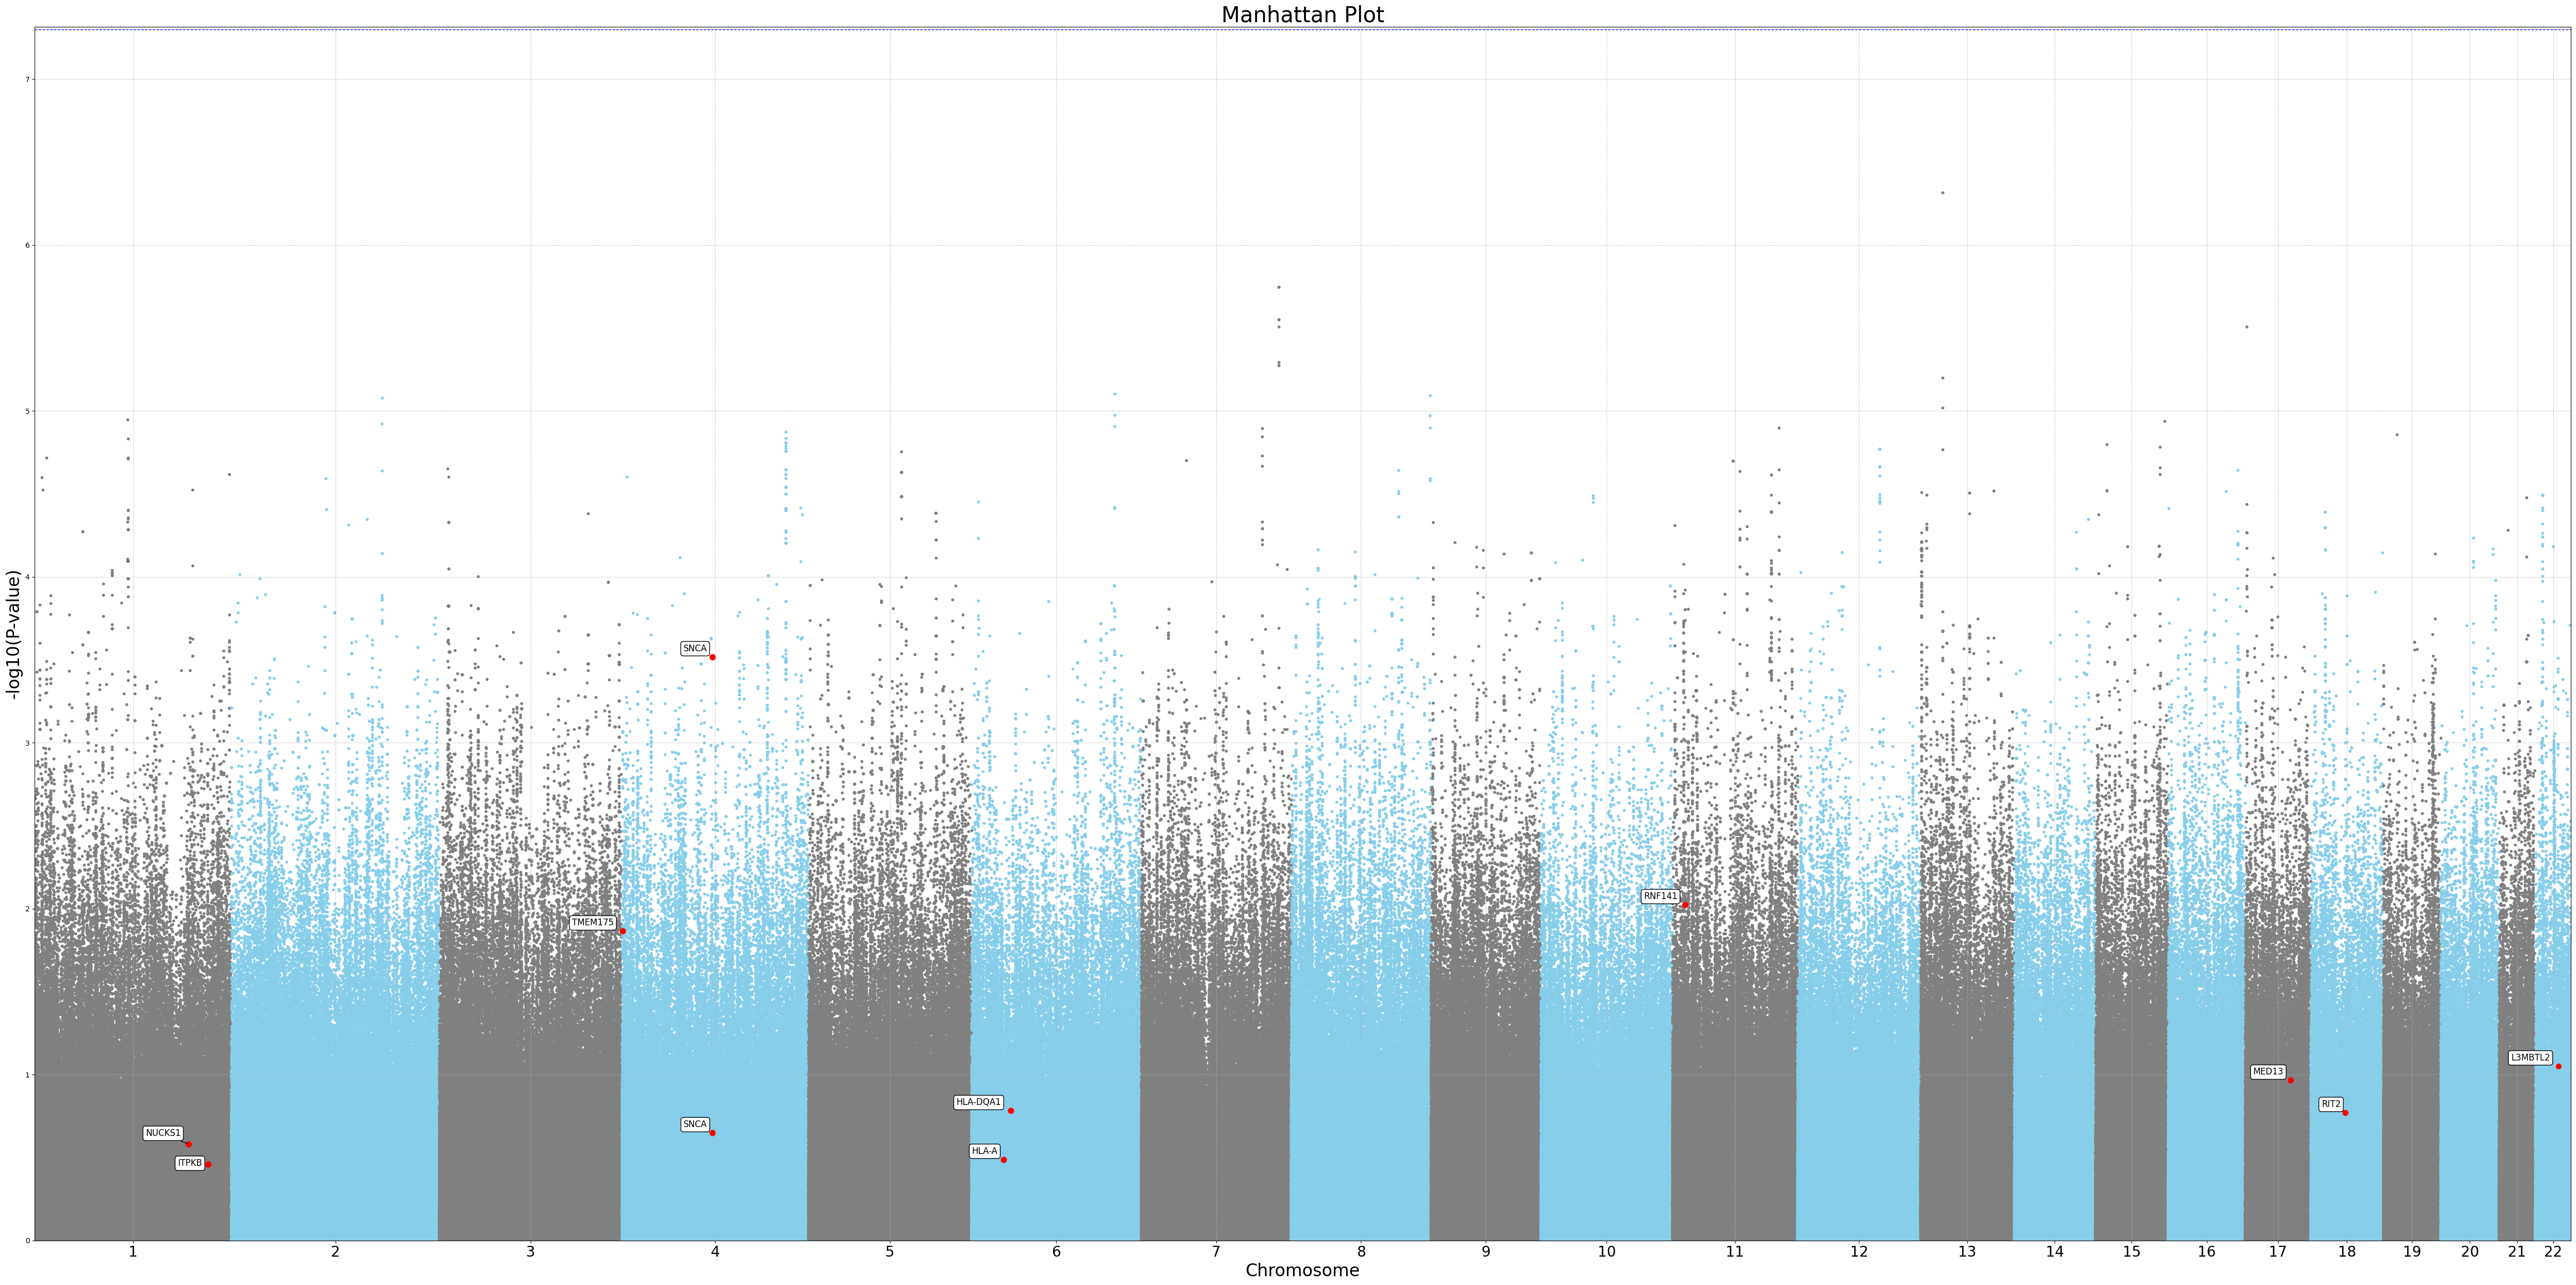

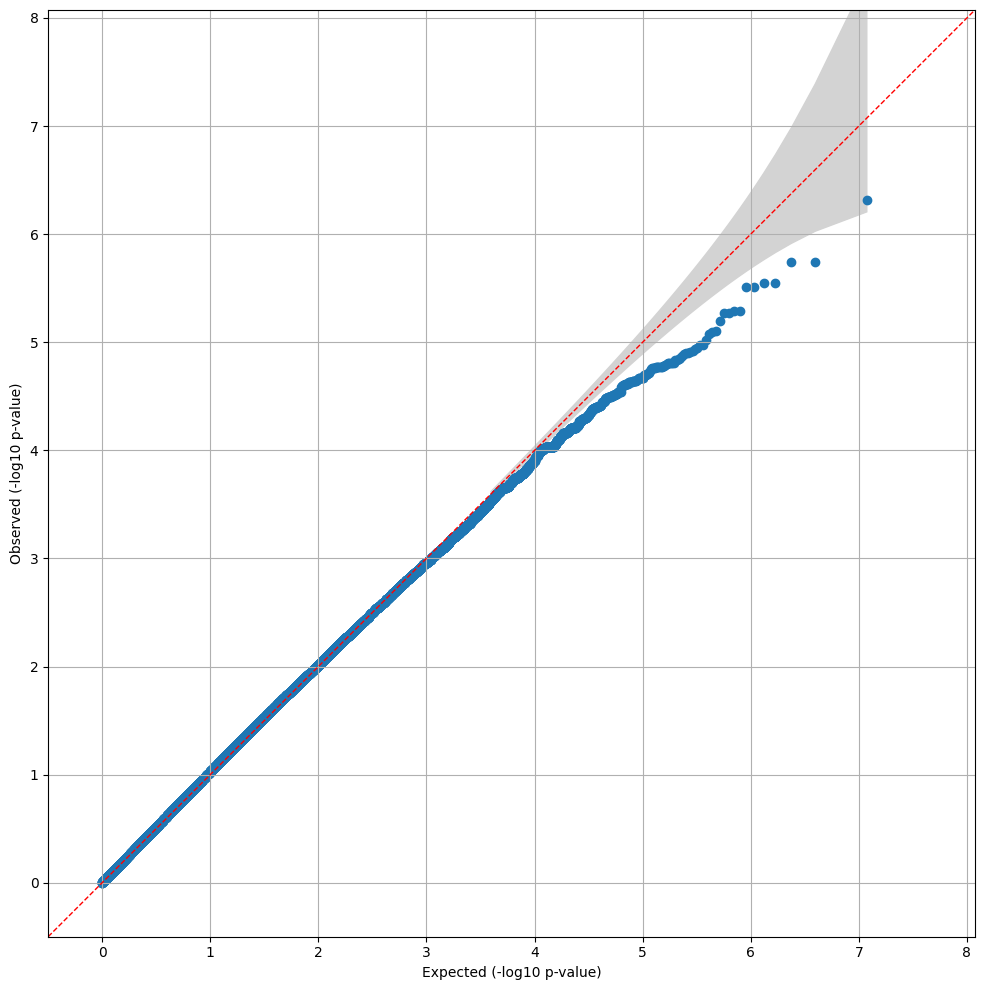

In [6]:
gwas_f_steps = {
    'train_model': gwas_f.fixed_model_association_analysis,
    'top_hits'   : gwas_f.get_top_hits,
    'annotate'   : gwas_f.annotate_top_hits,
    'plots'      : gwas_f.plot_drawings
}

for step in gwas_f_steps.keys():
    gwas_f_steps[step]()

In [7]:
gwas_r = GWASrandom(
    input_path = paths['input_directory'],
    input_name = paths['input_prefix'],
    output_path= paths['output_directory'],
    output_name= paths['output_prefix'],
    config_dict= params,
    preps_path = os.path.join(paths['output_directory'], 'preparatory'),
)

*******************************************************************
* Genome-wide Complex Trait Analysis (GCTA)
* version v1.94.1 Linux
* Built at Nov 15 2022 21:14:25, by GCC 8.5
* (C) 2010-present, Yang Lab, Westlake University
* Please report bugs to Jian Yang <jian.yang@westlake.edu.cn>
*******************************************************************
Analysis started at 14:18:22 CEST on Wed Sep 11 2024.
Hostname: IKEAB-TS-P3

Options: 
 
--bfile /home/luis/data/testDownStream/outputData/preparatory/ds_results_LDpruned 
--make-grm 
--thread-num 30 
--out /home/luis/data/testDownStream/outputData/gwas_random/ds_results_grm 

The program will be running with up to 30 threads.
Note: GRM is computed using the SNPs on the autosomes.
Reading PLINK FAM file from [/home/luis/data/testDownStream/outputData/preparatory/ds_results_LDpruned.fam]...
466 individuals to be included from FAM file.
466 individuals to be included. 322 males, 144 females, 0 unknown.
Reading PLINK BIM file from [/ho

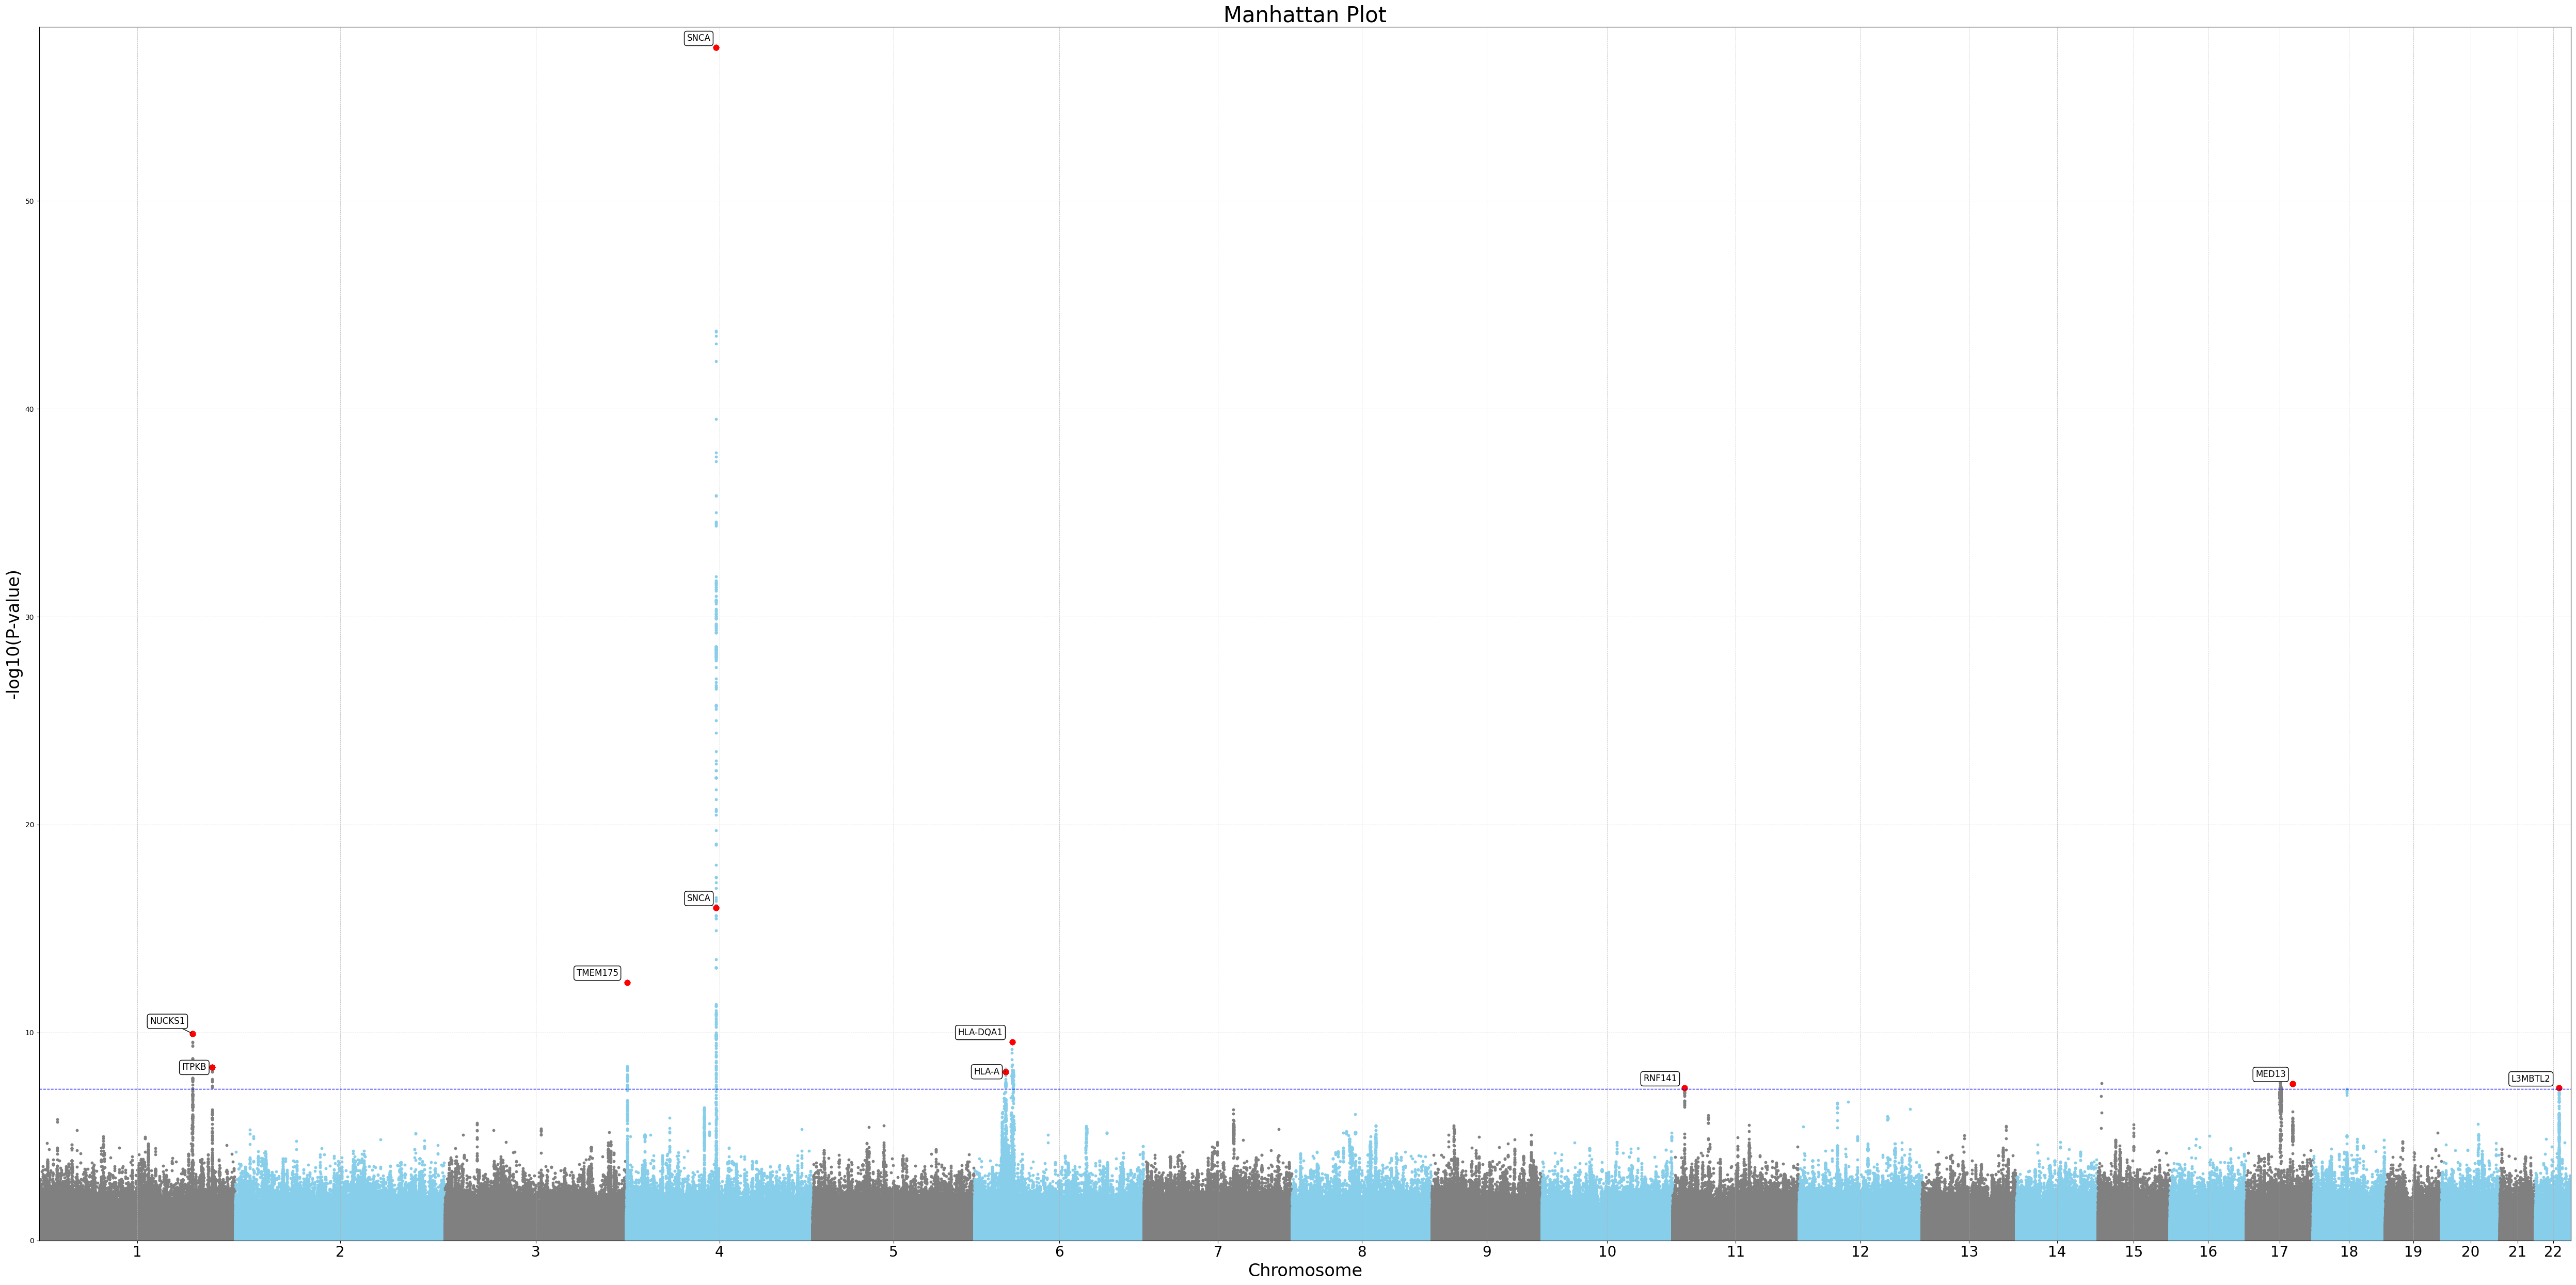

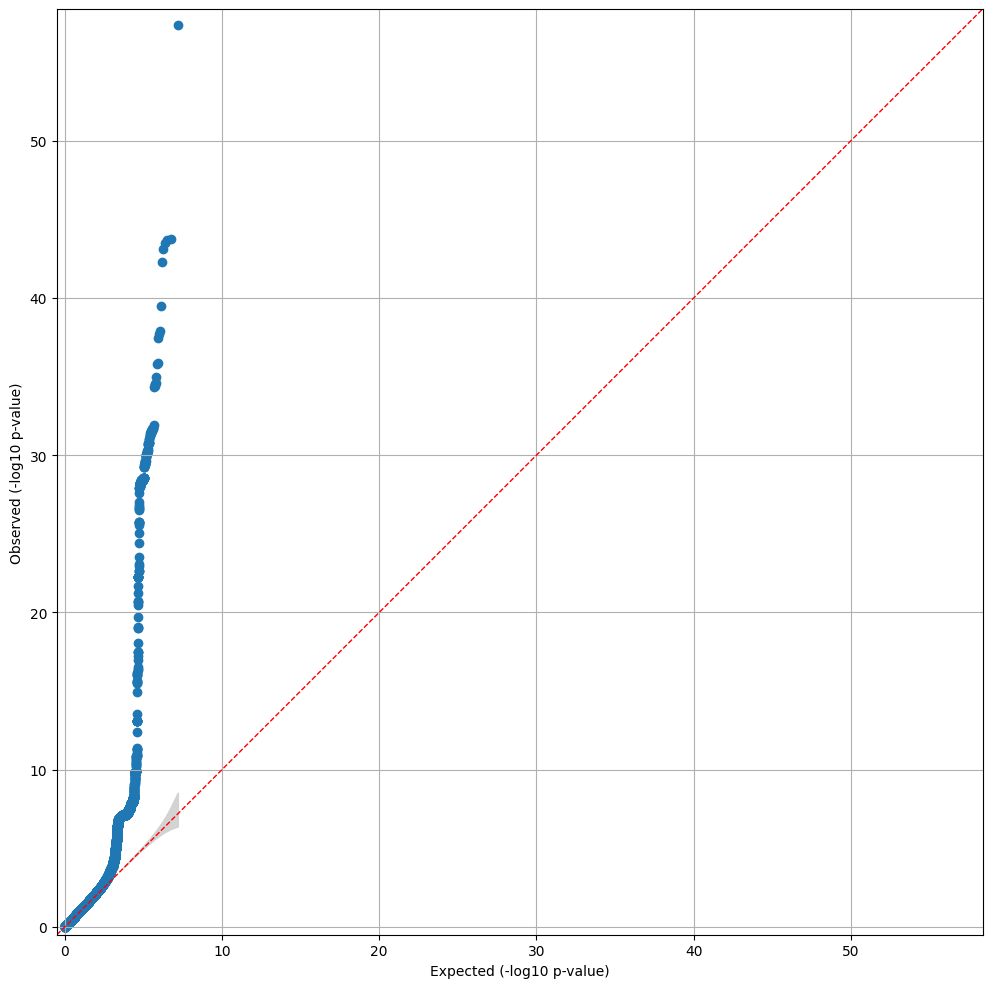

In [8]:
gwas_r_steps = {
    'preparatory': gwas_r.prepare_aux_files,
    'grm'        : gwas_r.compute_grm,
    'random'     : gwas_r.run_gwas_random,
    'top_hits'   : gwas_r.get_top_hits,
    'annotate'   : gwas_r.annotate_top_hits,
    'plots'      : gwas_r.plot_drawings
}
for step in gwas_r_steps.keys():
    gwas_r_steps[step]()